In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
def pivot_trends(df :pd.DataFrame, pivot: str, trend: str):
    """
    This method analyzes the port- and route-traffic trends from the given data, for a given
    traffic type specification, and the "time" trend to be analyzed.

    Parameters:
    -----------
    df :pd.DataFrame
        The dataset containing the traffic data.
    pivot :str
        The pivot refers to the ports/given category with which the data is "pivoted" around or centered around.
    trend :str
        The temporal grouping of the trend (5): "MonthYear", "QuarterYear", "Year" AND "MonthNum", "Quarter" (for seasonal shifts).
    """
    if trend == "QuarterYear":
        df[trend] = df["Year"].astype(str) + "-Q" + df["Quarter"].astype(str)

    ref = "ForeignPort" if pivot == "AustralianPort" else "AustralianPort"

    # --- Trend 1-4: Count of Unique Ports (C.O.U.P) being interacted with ---
    trend1 = (df.groupby([trend, pivot])[ref].nunique()
              .reset_index(name="COUP"))

    num = len(trend1[pivot].unique())
    hls_colors = sns.husl_palette(n_colors=num, s=1, l=0.5)
    colors = [hls_colors[i % num] for i in range(0, num, 2)] + [hls_colors[i] for i in range(1, num, 2)]

    plt.figure(figsize=(12,6))
    for i, port in enumerate(trend1[pivot].unique()):
        port_data = trend1[trend1[pivot] == port]
        plt.plot(port_data[trend], port_data["COUP"], marker="o", label=port, color=colors[i])

    plt.title(f"Count of Unique Ports (COUP) per {pivot} over {trend}")
    plt.xlabel(trend)
    plt.ylabel("COUP")
    plt.legend(title=pivot, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

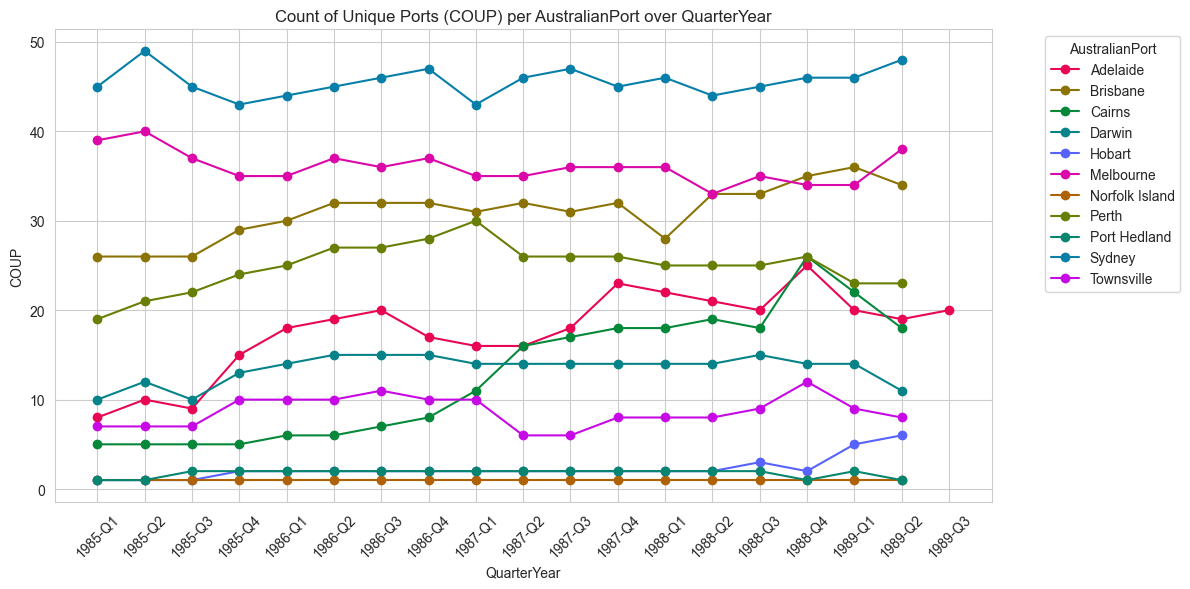

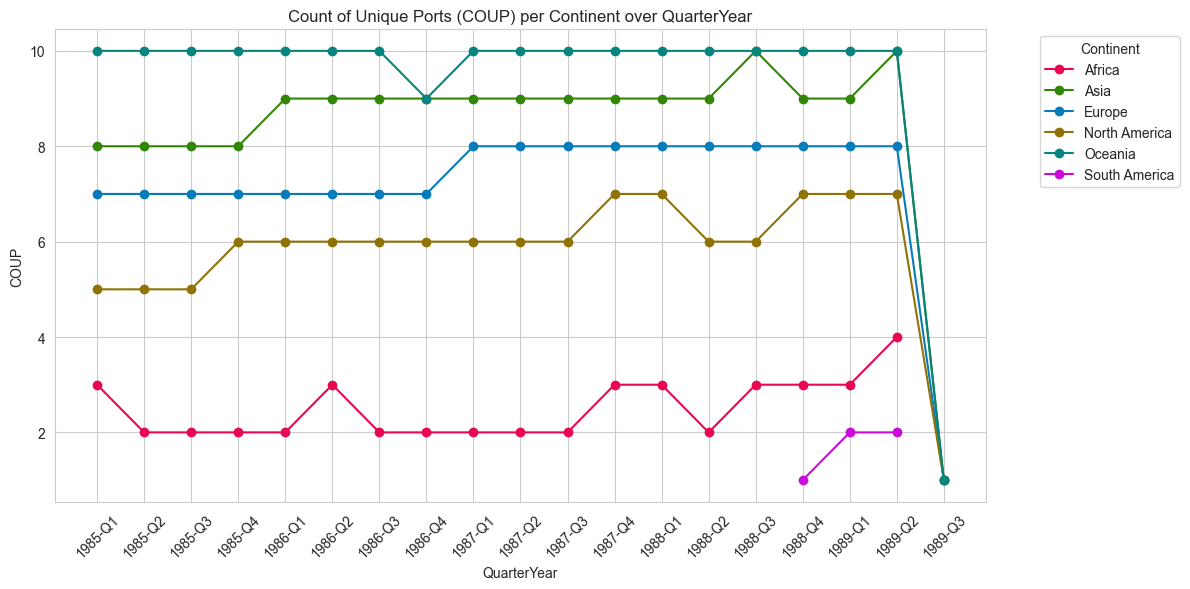

In [72]:
df = pd.read_csv("../data/aeroconnect_cleaned.csv")

traffic = ["PassengersTotal", "FreightTotal", "MailTotal"]
trend = ["MonthYear", "QuarterYear", "Year", "MonthNum", "Quarter"]

pivot_trends(df, pivot="AustralianPort", trend="QuarterYear")
# pivot_trends(df, pivot="ForeignPort", trend="Year") --> Make diff. graphs for each country?
# pivot_trends(df, pivot="Country", trend="Year") --> Make diff. graphs for each continent?
pivot_trends(df, pivot="Continent", trend="QuarterYear")